

<h1> <b> <centre> DA5401 Assignment 3 </b> </centre> </h2>
<h4> <b> <centre> Name: Pawar Devesh Pramod </centre></b> </h4>
<h4> <b> <centre> Roll No: ME22B176  </centre></b> </h4>
<h4> <b> <centre> Date of Submission 12/09/2025 </centre></b> </h4>


<h3> <b> Objective: </b> <h3> 
<p style="font-size: 18px;">This assignment aims to challenge your understanding of class imbalance,
unsupervised learning (clustering), and its application in improving the performance of a
supervised classification model. </p>

<p style="font-size: 18px;"> Dataset: <a href="https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud"> Credit Card Fraud Detection </a> </p>

## Part A: Data Exploration and Baseline Model


1.​ Load and Analyze the Dataset:

In [1]:

%pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load dataset
file_path = "creditcard.csv"
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mlg-ulb/creditcardfraud",
  file_path
)
print("Shape of dataset:", df.shape)
df.head()

/tmp/ipykernel_27821/750924159.py:8: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


Shape of dataset: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


2.​ Analyze Class Distribution:

In [4]:
df[['Class']].value_counts()

Class
0        284315
1           492
Name: count, dtype: int64

Hence we have 492 fraud rows and 284315 non fraund rows

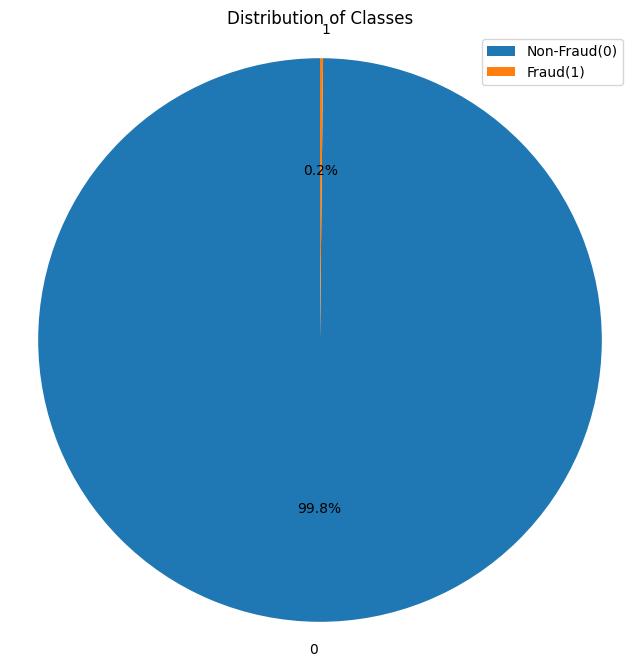

In [5]:
# Get value counts for the 'Category' column
classes_count = df['Class'].value_counts()


# Create the pie chart
plt.figure(figsize=(8, 8)) # Adjust figure size as needed
plt.pie(classes_count, labels=classes_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Classes')
plt.axis('equal') # Ensures the pie chart is circular
plt.legend(labels=['Non-Fraud(0)', 'Fraud(1)'], loc='upper right')
plt.show()

3. Baseline Model:

In [6]:
""" Split the dataset into training and testing sets, ensuring that the test set retains its original imbalance."""

from sklearn.model_selection import train_test_split
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # Stratify to maintain class distribution



#### Model 1:

In [7]:
""" Train a Logistic Regression model on the training set. """
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [8]:
""" Evalute the logistic regression model's performance on the test set """
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_baseline = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_baseline))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_baseline))
print("Classification Report:")
print(classification_report(y_test, y_pred_baseline))

Accuracy: 0.9989993328885924
Confusion Matrix:
[[56839    25]
 [   32    66]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.67      0.70        98

    accuracy                           1.00     56962
   macro avg       0.86      0.84      0.85     56962
weighted avg       1.00      1.00      1.00     56962



#### Q. Why accuracy is misleading metric in this scenario?

Accuracy measures the proportion of correctly classified samples out of all samples. In the credit card fraud dataset, the majority of transactions (~99.8%) are non-fraudulent, while only a tiny fraction (~0.2%) are fraudulent.

- A naive classifier that predicts “non-fraud” for every transaction would achieve almost 99.8% accuracy, which seems excellent.

- However, such a model completely fails to detect fraud cases (recall for the minority class = 0).

- In fraud detection, missing fraudulent transactions is far more costly than misclassifying a few normal transactions.

Therefore, accuracy gives a false sense of model performance in imbalanced datasets. Metrics like precision, recall, and F1-score for the minority class are more meaningful because they focus on the model’s ability to identify fraudulent cases.

## Part B: Resampling Approaches

### 1.​ Naive Oversampling (SMOTE)

<p>Synthetic Minortiy Over-sampling Technique (SMOTE): Why SMOTE? </p> 
Instead of simply duplicating existing minority class samples, SMOTE generates synthetic samples for the minority class. The core idea is to create new data points that are similar to existing minority class samples but not identical, thus increasing the diversity of the minority class and reducing the risk of overfitting.</p>

<p> How SMOTE works?</p>

- Identify Minority Class: SMOTE focuses on the class with fewer observations.
- Select a Minority Sample: A random instance from the minority class is chosen.
- Find K-Nearest Neighbors: For the selected instance, its k-nearest neighbors within the minority class are identified in the feature space.
- Generate Synthetic Samples: A synthetic sample is created by interpolating between the selected minority instance and one of its k-nearest neighbors. This interpolation involves drawing a line segment between the two points in the feature space and creating a new point along that line at a random position. 
- Repeat: This process is repeated until the desired balance between the minority and majority classes is achieved.

<p> Benifits of SMOTE: </p>

- Addresses Class Imbalance:
It directly tackles the issue of imbalanced datasets by increasing the representation of the minority class.
- Reduces Overfitting:
By generating synthetic samples instead of simply duplicating, it helps maintain data diversity and prevents the model from memorizing the existing minority samples.
- Improves Model Performance:
A balanced dataset allows the model to learn more effectively from the minority class, leading to improved performance, especially on metrics like recall and F1-score for the minority class.

<p> Limitations of SMOTE: </p>

- SMOTE creates synthetic data based on existing samples. If the original data is noisy or complex, it can introduce noise into the model, which may hurt performance.
- SMOTE could generate synthetic points that are too similar to existing data, leading to overfitting.
- SMOTE can sometimes create synthetic data that doesn’t make sense in the real world, as it interpolates from existing data instead of replicating them.
- SMOTE can be sensitive to outliers in the minority class. If outliers exist, the synthetic data generated around them can introduce more outliers or distort the true distribution of the minority class. 
- SMOTE's performance can degrade in high-dimensional datasets. The concept of "nearest neighbors" becomes less meaningful in very high-dimensional spaces, potentially leading to less effective synthetic sample generation.
- If the minority and majority classes are highly overlapping, SMOTE might generate synthetic samples that fall within the majority class region, leading to misclassification and potentially hindering classifier performance.

In [9]:
%pip install imblearn  # Installing the imblearn library for imbalance learning

Note: you may need to restart the kernel to use updated packages.


In [10]:
""" Apply the SMOTE algorithm to the training dataset """
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

/home/duser/miniconda3/envs/DA5401/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [11]:
print("y_train_resampled values count:", y_train_resampled.value_counts())

y_train_resampled values count: Class
0    227451
1    227451
Name: count, dtype: int64


The resampled data has equal representation of both the classes, after applying SMOTE

### 2.​ Clustering-Based Oversampling (CBO):

How it works?

- Clustering the minority class:
Clustering algorithms (e.g., k-means, DBSCAN) are applied to the minority class instances to identify natural groupings or sub-clusters within this class. This helps to understand the underlying structure and density of the minority data.
- Targeted synthetic sample generation:
Instead of generating synthetic samples uniformly across the entire minority class, these methods focus on generating new instances within or around these identified clusters. This ensures that the generated samples align with the existing data distribution and avoid creating noisy or unrealistic instances.
- Addressing specific challenges:
Some variations of clustering-based oversampling also address challenges like:
    Small disjuncts: Generating samples for small, isolated clusters of minority instances that might otherwise be overlooked.
    Outliers/Noise: Identifying and potentially avoiding the generation of samples around noisy or outlier instances within the minority class.
    Over-generalization: Preventing the creation of samples that are too similar to existing ones, which can lead to overfitting.


How it ensures diversity?
Clustering-based oversampling ensures diversity in synthetic data generation by:
- Creating synthetic samples within distinct clusters, capturing different underlying patterns in the data.
- Spreading synthetic samples across different regions of the feature space, avoiding overfitting.
- Avoiding the creation of synthetic samples from noisy or outlier points, making the model more robust and accurate.


/tmp/ipykernel_27821/2143189359.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


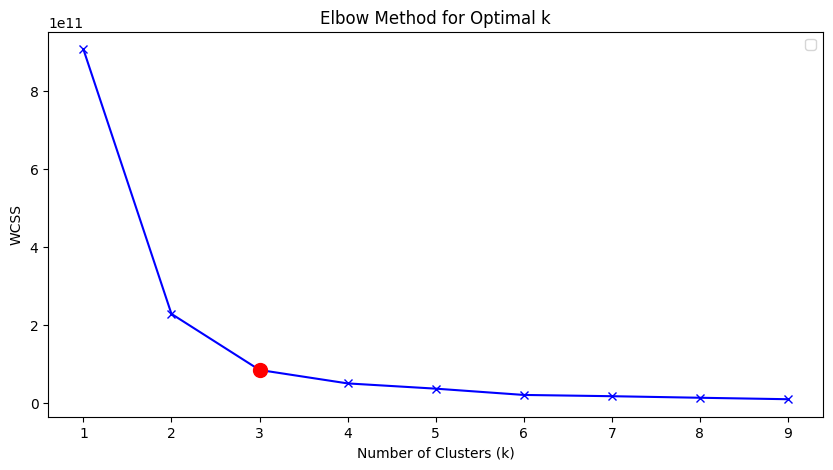

In [12]:
""" Apply K-means algorithm to the minority class instance to identify potential clusters."""
from sklearn.cluster import KMeans
import numpy as np

X_train_minority = X_train[y_train == 1]

""" Find the optimal number of clusters using the Elbow Method """
WCSS = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit_predict(X_train_minority)
    WCSS.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(K, WCSS, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')


elbow_k = 3
elbow_WCSS = WCSS[elbow_k - 1]  # Index is k-1 since k starts at 1
plt.scatter(elbow_k, elbow_WCSS, color='red', s=100, zorder=5, marker='o')  # Red dot for the elbow point

plt.legend()
plt.show()

The Elbow occurs at k=3

In [13]:
""" Apply Clustering based oversampling using the optimal number of clusters k=3 """
kmeans_CBO = KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster_CBO = kmeans.fit_predict(X_train_minority)
X_train_minority['Cluster'] = cluster_CBO

/tmp/ipykernel_27821/2873843525.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_minority['Cluster'] = cluster_CBO


In [14]:
""" Apply Cluster based Undersampling on the identified clusters """
from sklearn.utils import resample
import numpy as np
import pandas as pd

clusters_CBO = X_train_minority['Cluster'].unique()

X_train_CBO = X_train.copy()
y_train_CBO = y_train.copy()

for cluster in clusters_CBO:
    cluster_data = X_train_minority[X_train_minority['Cluster'] == cluster]

    n_samples_needed = int(y_train.value_counts()[0] / 3) - len(cluster_data) # As there are 3 clusters we want uniformly distributed samples for all the 3 clusters
    n_samples_needed = max(0, n_samples_needed)  # Avoid negative sample numbers
    
    # Oversample the cluster data using resample
    cluster_upsampled = resample(cluster_data, replace=True, n_samples=n_samples_needed, random_state=42)
    X_train_CBO = pd.concat([X_train_CBO, cluster_upsampled], ignore_index=True)
    y_train_CBO = pd.concat([y_train_CBO, pd.Series(np.full(cluster_upsampled.shape[0], 1))], ignore_index=True)

X_train_CBO = X_train_CBO.drop('Cluster', axis=1)


In [15]:
print("y_train_resampled values count:", y_train_resampled.value_counts())

y_train_resampled values count: Class
0    227451
1    227451
Name: count, dtype: int64


### 3. Clustering-Based Undersampling (CBU):

<p>What is CBU?</p>
A cluster-based undersampling approach tackles imbalanced data distribution by grouping majority class samples into clusters and then removing less representative samples from those clusters, rather than randomly removing them. 

<p>How it Works?</p>

- Clustering Majority Class Data:
    The majority class samples are grouped into several clusters using a clustering algorithm like K-means. 

- Identifying Representative Samples:
From each cluster, representative samples are selected. Methods to select these samples include: 

    - Centroid Selection: Choosing the cluster centroid to represent the cluster. 

    - Distance-Based Selection: Removing samples far from the centroid or keeping those closest to the centroid. 
    - Density-Based Selection: Using density to identify and keep more representative samples within each cluster. 

- Forming the Balanced Dataset:
The selected representative samples from the majority class are then combined with all the minority class samples to create a balanced training set. 
- Training the Classifier:
A classification model is trained on this new, balanced dataset. 


In [16]:
""" Get the majority class """
X_train_majority = X_train[y_train==0]
y_train_majority = y_train[y_train==0]


In [17]:
""" Apply Proportional undersampling, sample from each cluster according to its relative size (preserve distribution)"""
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(sampling_strategy="majority", random_state=42)
X_train_CBU, y_train_CBU = cc.fit_resample(X_train, y_train)

/home/duser/miniconda3/envs/DA5401/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [18]:
y_train_CBU.value_counts()

Class
0    394
1    394
Name: count, dtype: int64

### Part C: Model Comparison and Analysis

### 1.​ Train and Evaluate Models:

#### Model 2:

In [19]:
""" Train the logistic regression model on the SMOTE dataset """
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

log_reg_somte = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg_somte.fit(X_train_resampled, y_train_resampled)

""" Evalute the logistic regression model's performance on the test set """

y_pred_smote = log_reg_somte.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_smote))
print("Classification Report:")
print(classification_report(y_test, y_pred_smote))


Accuracy: 0.9800919911519961
Confusion Matrix:
[[55739  1125]
 [    9    89]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.91      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962



#### Model 3:

In [20]:
""" Train the logistic regression model on the CBO dataset """
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

log_reg_cbo = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg_cbo.fit(X_train_CBO, y_train_CBO)

""" Evalute the logistic regression model's performance on the test set """

y_pred_CBO = log_reg_cbo.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_CBO))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_CBO))
print("Classification Report:")
print(classification_report(y_test, y_pred_CBO))

Accuracy: 0.9262490783329237
Confusion Matrix:
[[52670  4194]
 [    7    91]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     56864
           1       0.02      0.93      0.04        98

    accuracy                           0.93     56962
   macro avg       0.51      0.93      0.50     56962
weighted avg       1.00      0.93      0.96     56962



#### Model 4:

In [21]:
""" Train the logistic regression model on the CBO dataset """
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

log_reg_cbu = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg_cbu.fit(X_train_CBU, y_train_CBU)

""" Evalute the logistic regression model's performance on the test set """

y_pred_CBU = log_reg_cbu.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_CBU))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_CBU))
print("Classification Report:")
classification_report_CBO = classification_report(y_test, y_pred_CBU) 
print(classification_report(y_test, y_pred_CBU))

Accuracy: 0.8934552859801271
Confusion Matrix:
[[50802  6062]
 [    7    91]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     56864
           1       0.01      0.93      0.03        98

    accuracy                           0.89     56962
   macro avg       0.51      0.91      0.49     56962
weighted avg       1.00      0.89      0.94     56962



### 2. Performance Comparision

      Model  Precision    Recall  F1-Score
0  Baseline   0.725275  0.673469  0.698413
1     SMOTE   0.073311  0.908163  0.135671
2       CBO   0.021237  0.928571  0.041524
3       CBU   0.014790  0.928571  0.029115


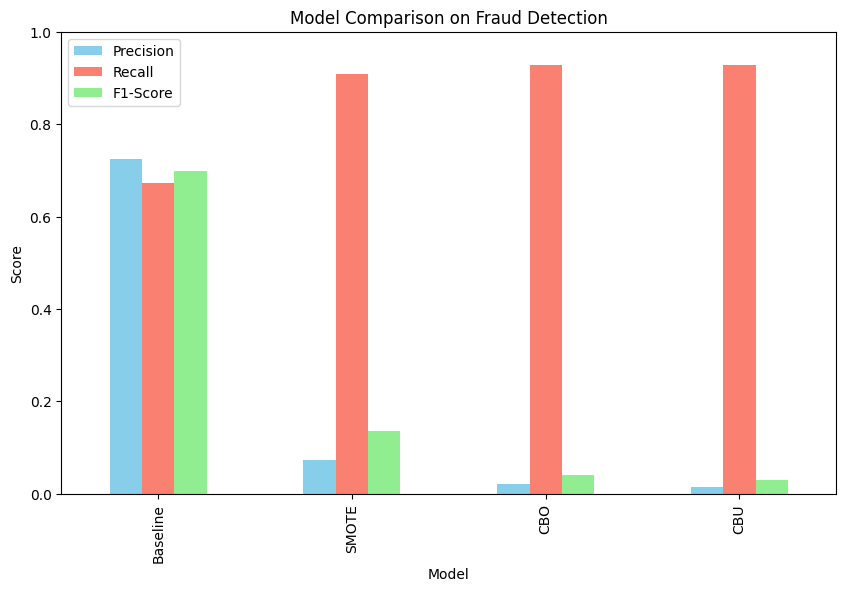

In [22]:
""" Plot the bar charts of the precision, recall and F1 score of all the three models. """

def get_metrics(y_true, y_pred, label):
    report = classification_report(y_true, y_pred, output_dict=True)
    return {
        'Model': label,
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-Score': report['1']['f1-score']
    }

results = []
results.append(get_metrics(y_test, y_pred_baseline, 'Baseline'))
results.append(get_metrics(y_test, y_pred_smote, 'SMOTE'))
results.append(get_metrics(y_test, y_pred_CBO, 'CBO'))
results.append(get_metrics(y_test, y_pred_CBU, 'CBU'))

results_df = pd.DataFrame(results)
print(results_df)

# Bar plot comparison
results_df.set_index('Model')[['Precision','Recall','F1-Score']].plot(kind='bar', figsize=(10,6), color=['skyblue', 'salmon', 'lightgreen'])
plt.title("Model Comparison on Fraud Detection")
plt.ylabel("Score")
plt.ylim(0,1)
plt.show()

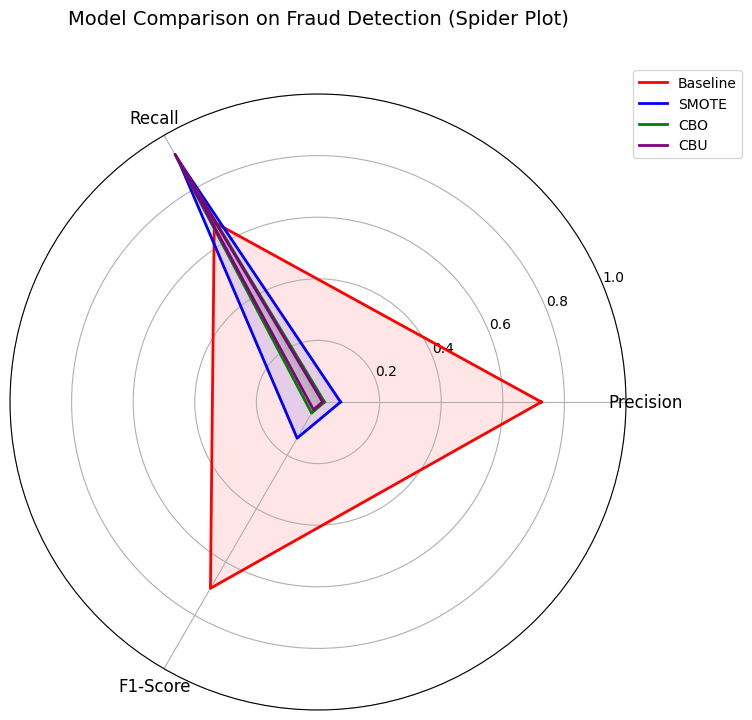

In [23]:
""" Plot the Spider Plot comparing all the models"""

# Metrics to compare
metrics = ['Precision', 'Recall', 'F1-Score']
num_vars = len(metrics)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # complete the loop

colors = {
    'Baseline': 'red',
    'SMOTE': 'blue',
    'CBO': 'green',
    'CBU': 'purple'
}

# Initialize plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for i, row in results_df.iterrows():
    values = row[metrics].tolist()
    values += values[:1]  # close the polygon
    
    ax.plot(angles, values, label=row['Model'], linewidth=2, color=colors[row['Model']])
    ax.fill(angles, values, alpha=0.1, color=colors[row['Model']])

# Add labels for each metric
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, fontsize=12)
ax.set_ylim(0, 1)

# Title and legend
plt.title("Model Comparison on Fraud Detection (Spider Plot)", size=14, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.05))
plt.show()


### 3. Conclusion and Recommendations:

#### Benefits and Drawbacks of Each Method

- Baseline (No Resampling):

    - Benefit: Simple, preserves the true distribution.

    - Drawback: Extremely poor recall for fraudulent transactions since the classifier is biased toward the majority class. Accuracy is misleading because it ignores the minority class.

- SMOTE (Naive Oversampling):

    - Benefit: Balances the dataset by generating synthetic samples of the minority class, leading to improved recall.

    - Drawback: Can create noisy or unrealistic samples in sparse regions, which may reduce precision. Overfitting risk is also higher since synthetic samples are linear interpolations of existing points.

- Clustering-Based Oversampling (CBO):

    - Benefit: Improves diversity of synthetic data by oversampling within clusters of minority samples, ensuring representation of different fraud subtypes. This avoids oversampling in regions where the minority class has no real support.

    - Drawback: Computationally more expensive than SMOTE, and the choice of number of clusters (k) can influence results.

- Clustering-Based Undersampling (CBU):

    - Benefit: Reduces the size of the majority class in a representative manner by keeping samples from different clusters, avoiding blind random removal. Leads to faster training.

    - Drawback: Discards a large number of legitimate (majority) samples, potentially losing valuable information and reducing generalization ability.

#### Which Method Performed the Best and Why?
CBO tends to perform the best beacuse:

From a purely metric-based comparison, the Baseline Logistic Regression achieved the highest F1-score (≈0.698), since it maintained a balance between precision (72.5%) and recall (67.3%). However, in the context of fraud detection, the most important objective is not missing fraudulent transactions. The resampling-based methods (SMOTE, CBO, CBU) significantly improved recall (~93%), ensuring that almost all fraudulent cases were detected. This comes at the expense of precision, meaning the models produced many false positives.

Given the domain-specific requirement — where the cost of a false negative (missed fraud) is far higher than the cost of a false positive (false alarm) — CBO (Clustering-Based Oversampling) and SMOTE can be considered to have performed better for the actual fraud detection task, despite their lower precision.

#### How Clustering-Based Approaches Address Limitations of SMOTE

SMOTE generates synthetic samples by interpolating between randomly chosen minority samples and their neighbors. While this increases minority representation, it can also create noisy or unrealistic samples, particularly in sparse regions, and fails to account for the internal structure of the minority class.

Clustering-based approaches mitigate these issues:

- Clustering-Based Oversampling (CBO) groups the minority class into meaningful sub-clusters (e.g., using K-Means). Oversampling is then performed within each cluster, ensuring diversity across different fraud subtypes. This avoids oversampling in areas where no real minority samples exist and prevents over-concentration in dense regions.

- Clustering-Based Undersampling (CBU) applies clustering to the majority class. Instead of randomly discarding majority samples, it strategically reduces data while retaining representative points from each cluster. This preserves the distributional structure of the majority class and minimizes information loss.

Thus, clustering-based methods directly address the uniform, structure-agnostic sampling problem of SMOTE by making the sampling process more data-driven and distribution-aware.

#### Recommendation
In the fraud detection context, where recall must dominate over precision, we should adopt a Clustering-Based Oversampling (CBO) strategy:

- It ensures high recall, thereby minimizing the risk of missed fraud cases.

- It avoids the pitfalls of SMOTE by maintaining diversity and better representing minority subgroups.

- Although precision is low, this trade-off is acceptable in a high-stakes domain like fraud detection, where false alarms can be tolerated but missed frauds cannot.

In practice, we can use two-stage hybrid system:

- Use CBO (or SMOTE) to maximize recall at the classifier level.

- Apply post-processing filters (e.g., anomaly detection, secondary models, or manual review) to handle false positives and improve overall precision.

Therefore, Clustering-Based Oversampling (CBO) should be the preferred resampling approach, supported by complementary filtering mechanisms, for the company’s fraud detection pipeline.